# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Plot-the-spectra-1" href="#Plot-the-spectra"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot the spectra</a></div><div class="lev1 toc-item"><a data-toc-modified-id="After-new-coverage-filtering-2" href="#After-new-coverage-filtering"><span class="toc-item-num">2&nbsp;&nbsp;</span>After new coverage filtering</a></div><div class="lev1 toc-item"><a data-toc-modified-id="After-more-stringent-coverage-filtering-3" href="#After-more-stringent-coverage-filtering"><span class="toc-item-num">3&nbsp;&nbsp;</span>After more stringent coverage filtering</a></div><div class="lev1 toc-item"><a data-toc-modified-id="read-data-in-at-least-15-ind-4" href="#read-data-in-at-least-15-ind"><span class="toc-item-num">4&nbsp;&nbsp;</span>read data in at least 15 ind</a></div>

# Plot the spectra

In [2]:
# load dadi module

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

error in importing Two Locus modules


In [3]:
% ll

total 12
-rw-rw-r-- 1 claudius 2024 May  2 20:36 deduplicated_spectra.ipynb
lrwxrwxrwx 1 claudius   49 May  2 20:31 ERY.unfolded.sfs -> ../../ANGSD/DEDUPLICATED/SFS/ERY/ERY.unfolded.sfs
-rw-rw-r-- 1 claudius  394 May  2 20:32 ERY.unfolded.sfs.dadi
-rw-rw-r-- 1 claudius  382 May  2 20:32 ERY.unfolded.sfs.dadi~


In [4]:
! cat ERY.unfolded.sfs.dadi

37 unfolded
745530.973693 0.000000 0.000000 0.000000 1.511207 31.139915 742.277780 996.574840 53.835765 77.892464 267.864348 402.498556 1001.384506 799.908011 87.548144 10.417559 3.587466 28.043104 285.994523 553.041669 50.311759 12.307022 16.224191 140.823247 1223.664044 25.338529 0.000023 0.000000 0.000000 0.000000 0.000462 935.713047 238.873913 0.013095 414.707504 666.260896 1075.268716 


This doesn't look good!

In [10]:
# import 1D spectrum of ery
fs_ery = dadi.Spectrum.from_file('ERY.unfolded.sfs.dadi')

fs_par = dadi.Spectrum.from_file('PAR.unfolded.sfs.dadi')

In [6]:
import pylab

In [7]:
%matplotlib inline

In [8]:
pylab.rcParams['figure.figsize'] = [14, 12]

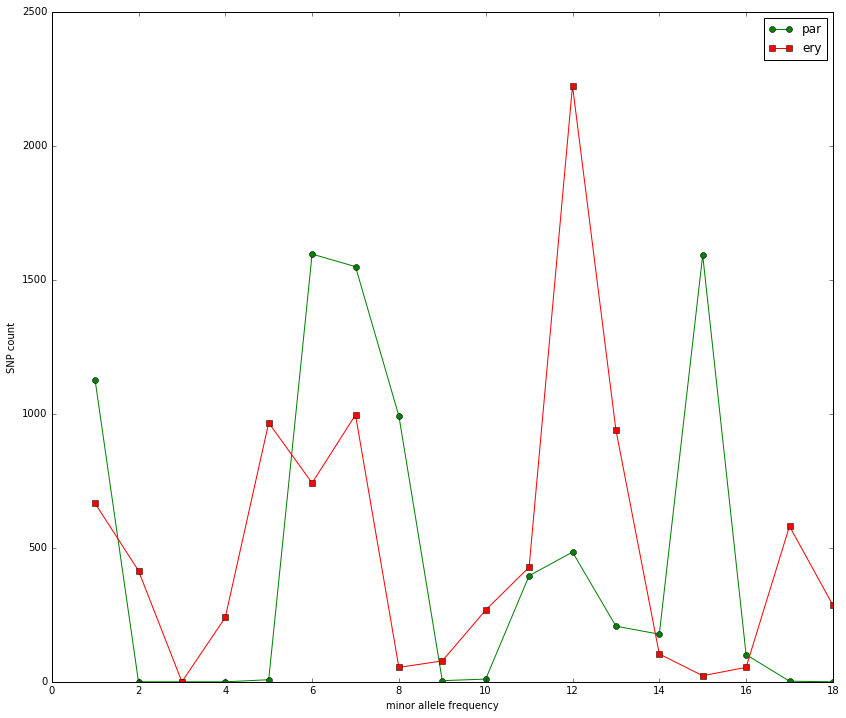

In [11]:
pylab.plot(fs_par.fold(), 'go-', label='par')
pylab.plot(fs_ery.fold(), 'rs-', label='ery')
pylab.xlabel('minor allele frequency')
pylab.ylabel('SNP count')
pylab.legend()

What is going on here?

# After new coverage filtering

I have done new excess and minimum coverage filtering. See `excess_coverage_filter.py` and `minimum_coverage_filter.py`. This resulted in many more positions, contigs and reads retained, i. e. more info to determine SFS.

I have created SAF's with a minimum of 9 individuals with read data and used the accellerated version of the EM algorithm in `realSFS`.

In [1]:
# load dadi module

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

In [12]:
# import 1D spectrum of ery
fs_ery = dadi.Spectrum.from_file('Ery.unfolded.sfs.dadi')

fs_par = dadi.Spectrum.from_file('Par.unfolded.sfs.dadi')

In [13]:
fs_ery.S()

27126.432315000002

In [8]:
import pylab

In [9]:
%matplotlib inline

In [10]:
pylab.rcParams['figure.figsize'] = [12, 10]

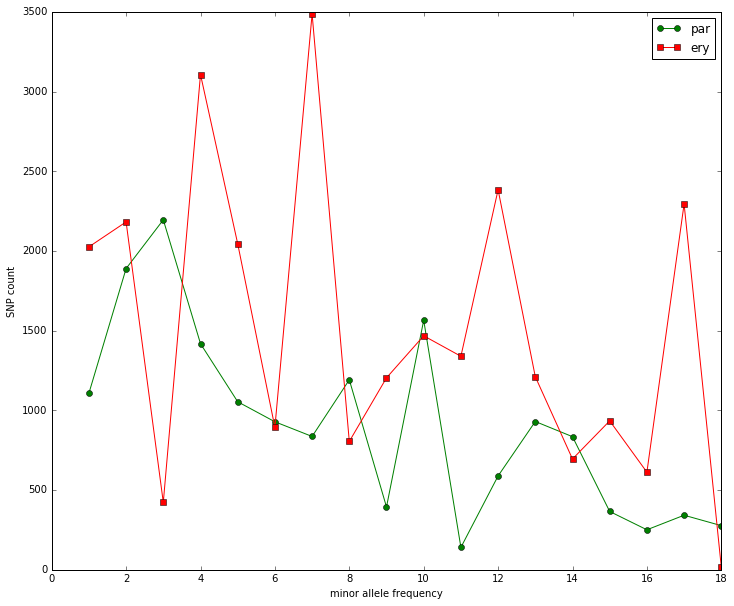

In [8]:
pylab.plot(fs_par.fold(), 'go-', label='par')
pylab.plot(fs_ery.fold(), 'rs-', label='ery')
pylab.xlabel('minor allele frequency')
pylab.ylabel('SNP count')
pylab.legend()

Unfortunately, this is still completely unusable. Only few sites are inferred variable.

I think that the coverage is too low for ANGSD to be able to destinguish alleles from sequencing errors. The ML SFS is therefore probably very unstable.

# After more stringent coverage filtering

I have applied a slightly more stringent minimum coverage filtering: instead of at least 1x in 15 ind. I have applied 3x in 10 ind. This retained 368,764 sites on 9,119 contigs. Other than that, I have applied exactly the same filtering as above. Before HWE filtering there were 414,122 sites from originally 85,488,084 sites (0.48%). There were only 125,875 sites if I had filtered for 3x coverage in at least 15 individuals.

In [6]:
% ll ../../ANGSD/DEDUPLICATED/afs/ery

total 8
-rw-rw-r-- 1 claudius 382 May 18 08:05 ery.unfolded.sfs
-rw-rw-r-- 1 claudius 394 May 18 08:13 ery.unfolded.sfs.dadi


In [15]:
# import 1D spectrum of ery
fs_ery = dadi.Spectrum.from_file('../../ANGSD/DEDUPLICATED/afs/ery/ery.unfolded.sfs.dadi')

fs_par = dadi.Spectrum.from_file('../../ANGSD/DEDUPLICATED/afs/par/par.unfolded.sfs.dadi')

In [16]:
fs_ery.S()

5674.7376270000004

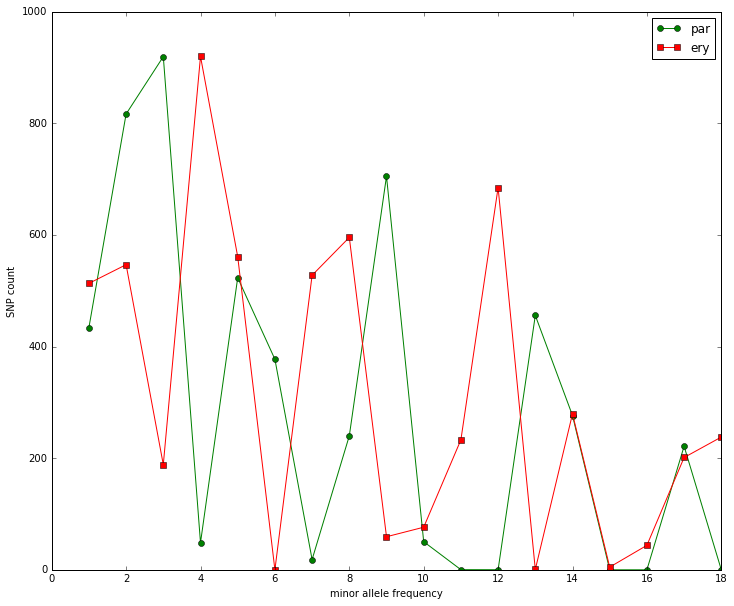

In [11]:
pylab.plot(fs_par.fold(), 'go-', label='par')
pylab.plot(fs_ery.fold(), 'rs-', label='ery')
pylab.xlabel('minor allele frequency')
pylab.ylabel('SNP count')
pylab.legend()

Unfortunately, the _Big Data_ set from standard RAD sequencing does not provide enough information for genotype likelihoods to estimate allele frequency spectra from. It may be that the coverage filtering just leaves too few sites that can provide enough signal to overcome the noise in the data.

# read data in at least 15 ind

Using the sites that had at least 3x coverage in at least 10 individuals across the two populations, I have run the SAF calculation again with `-minInd 15`, that is requiring at least 15 (of 18) individuals with read data (i. e. at least 1x coverage).

In [18]:
# import 1D spectrum of ery
fs_ery = dadi.Spectrum.from_file('../../ANGSD/DEDUPLICATED/afs/ery/ery.unfolded.15.sfs.dadi')

fs_par = dadi.Spectrum.from_file('../../ANGSD/DEDUPLICATED/afs/par/par.unfolded.15.sfs.dadi')

In [19]:
fs_ery.S()

4441.323907

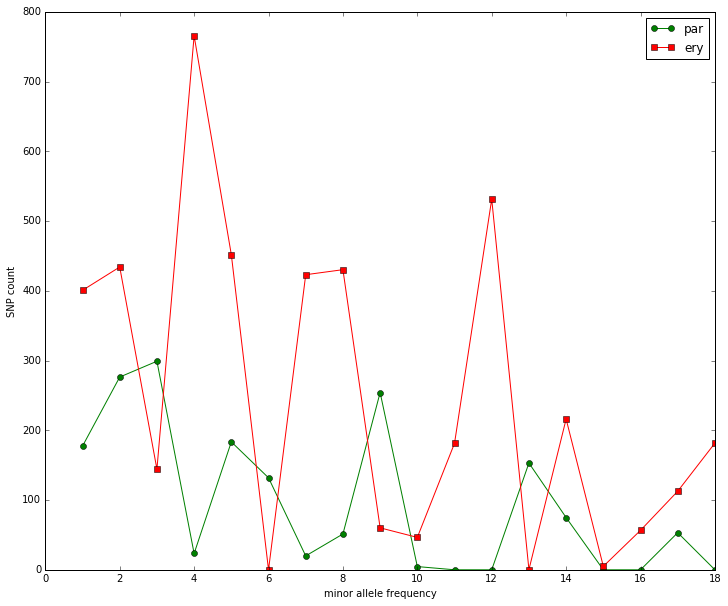

In [20]:
pylab.plot(fs_par.fold(), 'go-', label='par')
pylab.plot(fs_ery.fold(), 'rs-', label='ery')
pylab.xlabel('minor allele frequency')
pylab.ylabel('SNP count')
pylab.legend()